In [1]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [2]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,800
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


There is 3 zone in the post. 1 is left zone, 2 is middle zone and 3 is right zone
Enter Zone Number: 2
Where do you want the keeper to position? 2
Keeper saved the ball


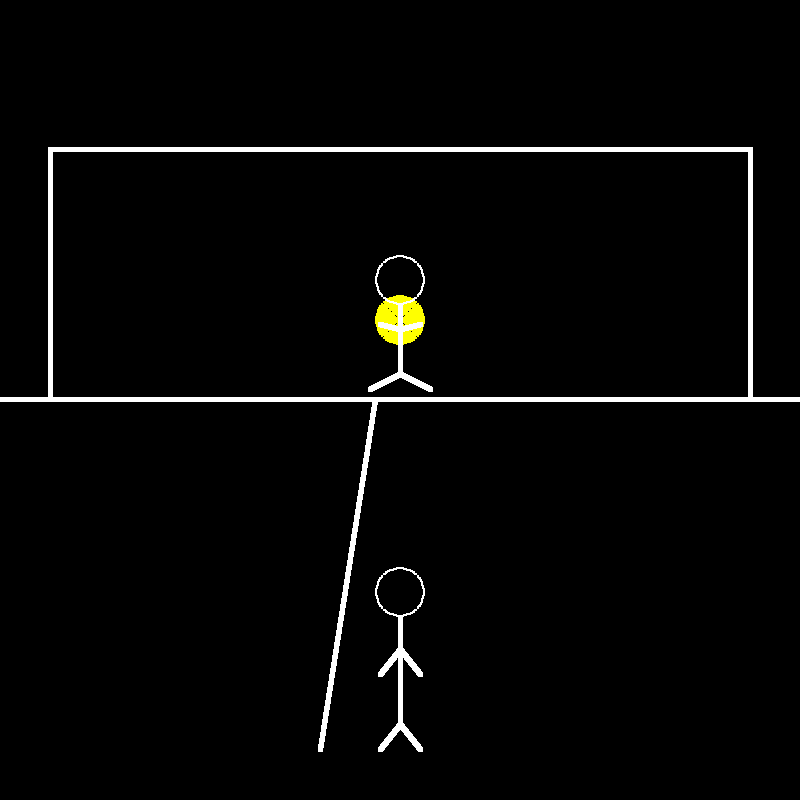

In [4]:
import math
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(1,1,1)
gl.glPointSize(20)

def drawPixel(x, y):
   gl.glColor3f(1,1,1)
   gl.glPointSize(5)
   gl.glBegin(gl.GL_POINTS)
   gl.glVertex2f(x,y)
   gl.glEnd()

def findZone(x1, y1, x2, y2):
   dx = x2 - x1
   dy = y2 - y1
   if abs(dx) >= abs(dy):
       if dx > 0 and dy > 0:
           return 0
       elif dx < 0 and dy > 0:
           return 3
       elif dy < 0 and dx < 0:
           return 4
       else:
           return 7

   else:
       if dy > 0 and dx > 0:
           return 1
       elif dx < 0 and dy > 0:
           return 2
       elif dx < 0 and dy < 0:
           return 5
       else:
           return 6


def convertToZero(x, y, z):
   if z == 0:
       return x, y
   elif z == 1:
       return y, x
   elif z == 2:
       return y, -x
   elif z == 3:
       return -x, y
   elif z == 4:
       return -x, -y
   elif z == 5:
       return -y, -x
   elif z == 6:
       return -y, x
   else:
       return x, -y


def convert_to_Original(x, y, z):
   if z == 0:
       return x, y
   elif z == 1:
       return y, x
   elif z == 2:
       return -y, x
   elif z == 3:
       return -x, y
   elif z == 4:
       return -x, -y
   elif z == 5:
       return -y, -x
   elif z == 6:
       return y, -x
   else:
       return x, -y


def midpointLine(x0, y0, x1, y1):
   zone = findZone(x0, y0, x1, y1)
   if zone!=0:
     x0, y0 = convertToZero(x0, y0, zone)
     x1, y1 = convertToZero(x1, y1, zone)
   dy = y1 - y0
   dx = x1 - x0
   d = (2*dy) - dx
   E = 2*dy
   NE = 2*(dy-dx)
   x = x0
   y = y0

   while x <= x1:
       p1, p2 = convert_to_Original(x, y, zone)
       drawPixel(p1/400, p2/400)
       x += 1
       if d > 0:
           d += NE
           y += 1
       else:
           d += E




def fraction(x,y):
  return (x/50,y/50)


def midpointCircle2(a,b,r):  #For ball
  gl.glColor3f(1,1,0)
  gl.glPointSize(2.5)
  gl.glBegin(gl.GL_POINTS)
  a,b=fraction(a,b)

  x=0
  y=r
  d=1-r

  while x<y:
    m=x
    n=y
    m,n=fraction(x,y)
    gl.glVertex2f(n+a,m+b)
    gl.glVertex2f(m+a,n+b)
    gl.glVertex2f(-m+a,n+b)
    gl.glVertex2f(-n+a,m+b)
    gl.glVertex2f(-n+a,-m+b)
    gl.glVertex2f(-m+a,-n+b)
    gl.glVertex2f(m+a,-n+b)
    gl.glVertex2f(n+a,-m+b)
    if d<0:
      #For E
      d=d+2*x+.3
      x+=.1
    else:
      #for SE
      d=d+2*x-2*y+.5
      x+=.1
      y-=.1

  gl.glEnd()


def midpointCircle3(a,b,r):  #For head
  gl.glColor3f(1,1,1)
  gl.glPointSize(2.5)
  gl.glBegin(gl.GL_POINTS)
  a,b=fraction(a,b)

  x=0
  y=r
  d=1-r

  while x<y:
    m=x
    n=y
    m,n=fraction(x,y)
    gl.glVertex2f(n+a,m+b)
    gl.glVertex2f(m+a,n+b)
    gl.glVertex2f(-m+a,n+b)
    gl.glVertex2f(-n+a,m+b)
    gl.glVertex2f(-n+a,-m+b)
    gl.glVertex2f(-m+a,-n+b)
    gl.glVertex2f(m+a,-n+b)
    gl.glVertex2f(n+a,-m+b)
    if d<0:
      #For E
      d=d+2*x+.3
      x+=.1
    else:
      #for SE
      d=d+2*x-2*y+.5
      x+=.1
      y-=.1
      
  gl.glEnd()


print("There is 3 zone in the post. 1 is left zone, 2 is middle zone and 3 is right zone")
jk = int(input("Enter Zone Number: "))

k=int(input("Where do you want the keeper to position? "))


def lineTranslation(z,t,p,q):
  pk = np.array([[1, 0, p],
             [0, 1, q],
             [0, 0, 1]])
  v1 = np.array([[-350],
              [0],
              [1]])
  ps1 = np.matmul(pk,v1)


  midpointLine(-z, -t,ps1[0][0], 0)

  



if jk ==1 :
  lineTranslation(80,350,0,0)
  if jk== k:
    scale = 2
  else:
    scale = 1
elif jk==2:
  lineTranslation(80,350,325,0)
  if jk==k:
    scale = 2
  else:
    scale = 1

elif jk==3:
  lineTranslation(80,350,650,0)
  if jk==k:
    scale = 2
  else:
    scale = 1

else:
  print("The ball went above the post!")
  exit()

a=3
b=3
r = np.array([[a, -b, 0],
             [b, a, 0],
             [0, 0, 1]])


sc = scale
s = np.array([[sc, 0, 0],
             [0, sc, 0],
             [0, 0, 1]])


rs = np.matmul(r,s)
Size=rs[0][0]

##Ball

if jk==1:
  midpointCircle2(-30,10,Size)

  Size1 = Size
  while Size1>0:
    midpointCircle2(-30,10,Size1)
    Size1 -= 0.2
elif jk==2: 
  midpointCircle2(0,10,Size)

  Size1 = Size
  while Size1>0:
    midpointCircle2(0,10,Size1)
    Size1 -= 0.2

elif jk==3:
  midpointCircle2(30,10,Size)

  Size1 = Size
  while Size1>0:
    midpointCircle2(30,10,Size1)
    Size1 -= 0.2




#surface
midpointLine(-400, 0, 400, 0)



#Goal Post
midpointLine(-350, 250, -350, 0)
midpointLine(350, 250, 350, 0)
midpointLine(-350, 250, 350, 250)




##Stickfig
midpointCircle3(0,-24,3)#head
midpointLine(0, -220,0, -325) #Body
midpointLine(0, -325,-20, -350) #Left leg
midpointLine(0, -325,20, -350) #right Leg
midpointLine(0, -250,20, -275) #right hand
midpointLine(0, -250, -20, -275) #left hand



if k==1:
  midpointCircle3(-30,15,3)#head2
  midpointLine(-240, 92,-240, 25) #Body2
  midpointLine(-240, 25,-200, 15) #Right leg2
  midpointLine(-240, 25, -280, 15) #Left Leg2
  midpointLine(-240, 70,-200, 75) #right hand2
  midpointLine(-240, 70,-280, 75) #left hand2

elif k==2: 
  midpointCircle3(0,15,3)#head2
  midpointLine(0, 92,0, 25) #Body2
  midpointLine(0, 25,-30, 10) #Left leg2
  midpointLine(0, 25,30, 10) #right Leg2
  midpointLine(0, 70,20, 75) #right hand2
  midpointLine(0, 70,-20, 75) #left hand2

elif k==3: 
  midpointCircle3(30,15,3)#head2
  midpointLine(240, 92,240, 25) #Body2
  midpointLine(240, 25,200, 15) #Left leg2
  midpointLine(240, 25, 280, 15) #Right Leg2
  midpointLine(240, 70,200, 75) #Left hand2
  midpointLine(240, 70,280, 75) #right hand2

else:
  print("Keeper Can't be outside of the post")


if jk==k:
  print("Keeper saved the ball")
else:
  print("Goal!")

from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))


